In [15]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

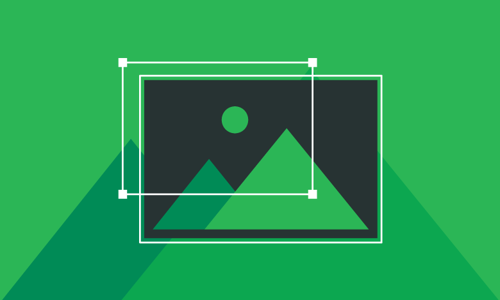

In [25]:
# Reading image form url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
# this link can be modified to load any image from the internet
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

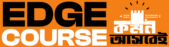

In [26]:
# Reading logo form url
logo = Image.open(requests.get('https://edgecoursebd.com/wp-content/uploads/2024/01/cropped-Picsart_24-01-02_00-34-26-702-169x47.png', stream=True).raw)
logo
# This link can be modified to use any logo

In order to use these images we will first convert them into rbg format and store it as a numpy array. Similarly, we will also extract the shape i.e. it's height and width.

In [27]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape # The channel of the image is not necessary
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [28]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

A Region of Interest (ROI) is defined as the area we need to place our watermark on. Here, we will find out ROI using the coordinates we found above. Next we will use OpenCV to merge our logo on ROI. Similarly we will also add a line or a pattern on our image.

In [29]:
print(roi.shape)
print(logo.shape)


(99, 449, 3)
(47, 169, 3)


In [30]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]

# Resize the logo to match the ROI dimensions
logo_resized = cv2.resize(logo, (roi.shape[1], roi.shape[0]))

# Add the resized logo to the ROI
result = cv2.addWeighted(roi, 1, logo_resized, 1, 0)

# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)

# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result


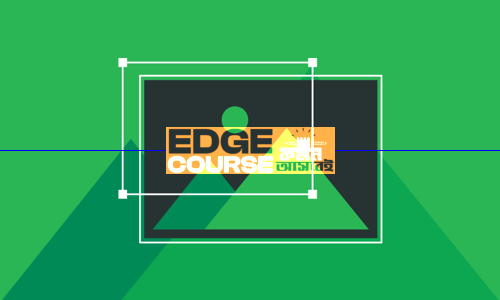

In [31]:
# Ploting the logo with watermark image
img = Image.fromarray(image_logow, 'RGB')
img

Next, the usage of a text as a watermark shall be demonstrated. We will convert our image into RGB and save it as a numpy array. To put a text as a watermark we will be using putText() function of OpenCV. Here we can use different features like size of the text, thickness of the text, font family, etc.

In [33]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='EdgeCourse', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4);

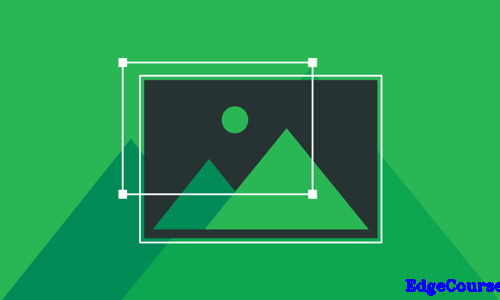

In [35]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg

# To visualize the image, we need to convert it back to RGB format.